In [24]:
import pandas as pd
import numpy as np  
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline
import pickle

In [25]:
df = pd.read_csv("/Users/benny/Downloads/Cardetails.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [26]:
#convert the categorical columns to numerical values and clean the data

df['engine'] = df['engine'].astype(str).str.replace(' CC', '', regex=False)
df['mileage'] = df['mileage'].astype(str).str.replace(' km/kg', '', regex=False)
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')

df['max_power'] = df['max_power'].astype(str).str.replace(' bhp', '', regex=False)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')

df['mileage'] = df['mileage'].astype(str).str.replace(' kmpl', '', regex=False)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [27]:
#drop Torgue column as it is not needed for the analysis
df.drop(['torque'],axis=1,inplace=True)

In [28]:
#check the data types of the columns ans the null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [29]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 20)
print(df.describe())

              year  selling_price     km_driven       engine    max_power        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000  7912.000000  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04  1458.625016    91.517919     5.416719
std       4.044249   8.062534e+05  5.655055e+04   503.916303    35.822499     0.959588
min    1983.000000   2.999900e+04  1.000000e+00   624.000000     0.000000     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04  1197.000000    68.050000     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04  1248.000000    82.000000     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04  1582.000000   102.000000     5.000000
max    2020.000000   1.000000e+07  2.360457e+06  3604.000000   400.000000    14.000000


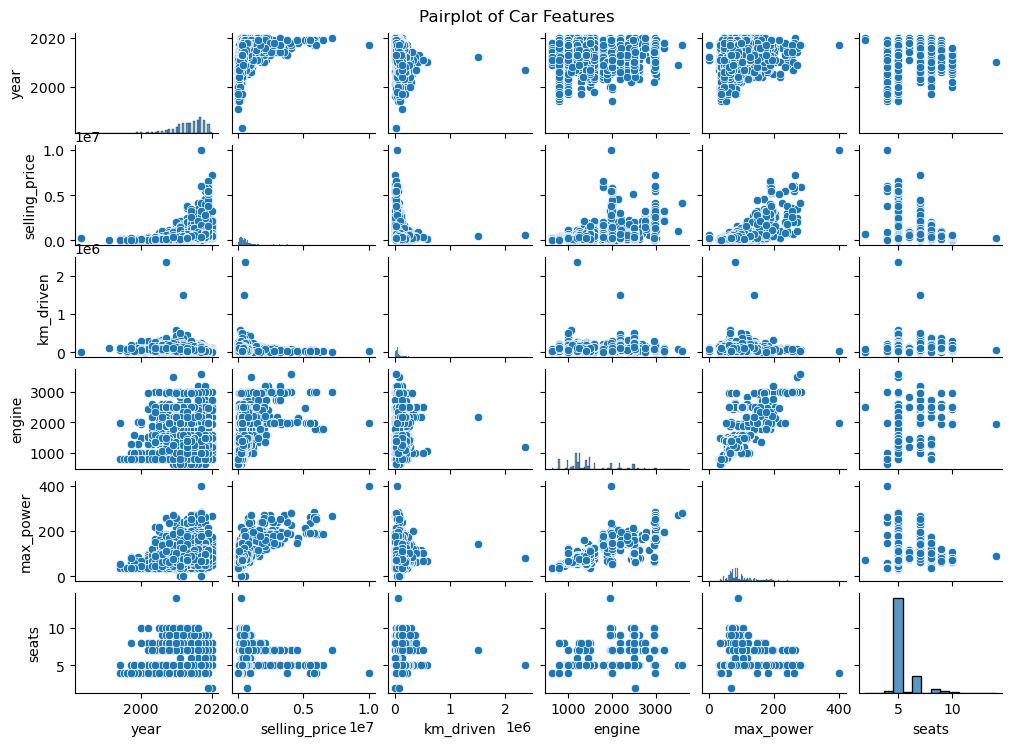

In [30]:
#Pairplot to check the relationship between the features and decide which features to use for the model
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now create the pairplot
g = sns.pairplot(numeric_df)
g.figure.suptitle('Pairplot of Car Features', y=1.02)
g.figure.set_size_inches(10, 7) 
plt.show()

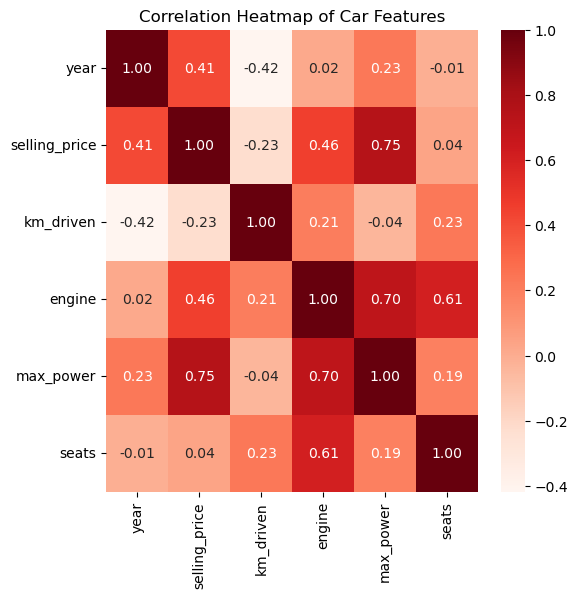

In [31]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Create the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))  # Adjust size if needed
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Car Features')

# Show the plot
plt.show()

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
#get the first word as the name of the car
df['name'] = df['name'].str.split(' ').str[0]

In [34]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

df['mileage'] = df['mileage'].apply(clean_data)

In [35]:
#assign the categorical columns to numerical values
df['name'] = df['name'].replace({
    'Maruti': 1, 'Skoda': 2, 'Honda': 3, 'Hyundai': 4, 'Toyota': 5, 'Ford': 6, 'Renault': 7,
    'Mahindra': 8, 'Tata': 9, 'Chevrolet': 10, 'Fiat': 11, 'Datsun': 12, 'Jeep': 13,
    'Mercedes-Benz': 14, 'Mitsubishi': 15, 'Audi': 16, 'Volkswagen': 17, 'BMW': 18, 'Nissan': 19,
    'Lexus': 20, 'Jaguar': 21, 'Land': 22, 'MG': 23, 'Volvo': 24, 'Daewoo': 25, 'Kia': 26,
    'Force': 27, 'Ambassador': 28, 'Ashok': 29, 'Isuzu': 30, 'Opel': 31, 'Peugeot': 32
})

df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 2})
df['transmission'] = df['transmission'].astype(int)
df['fuel'] = df['fuel'].replace({'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric': 5})
df['fuel'] = df['fuel'].astype(int)
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})   
df['owner'] = df['owner'].astype(int)
df['seller_type'] = df['seller_type'].replace({'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3})
df['seller_type'] = df['seller_type'].astype(int)


/var/folders/3z/p6xfxjjn4gn2p4n6s83t1_hh0000gn/T/ipykernel_2079/4111369169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['name'] = df['name'].replace({
/var/folders/3z/p6xfxjjn4gn2p4n6s83t1_hh0000gn/T/ipykernel_2079/4111369169.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission'] = df['transmission'].replace({'Manual': 1, 'Automatic': 2})
/var/folders/3z/p6xfxjjn4gn2p4n6s83t1_hh0000gn/T/ipykernel_2079/4111369169.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in 

In [36]:
df.dtypes

name               int64
year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [37]:
#split the data into X and Y 
x = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [38]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(1386, 11)
(5540, 11)
(1386,)
(5540,)


In [40]:
#scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))


In [41]:
# 1. Create the model
model = RandomForestRegressor(random_state=42)  # you can set n_estimators=100 too

# 2. Train (fit) the model
model.fit(x_train, y_train.ravel())  # .ravel() is used to convert y_train to 1D array

# 3. Predict on your x_train or x_test
y_pred= model.predict(x_test)
y_pred

array([ 0.34345082,  1.01668503,  0.64016703, ..., -0.44113771,
        0.22203615,  0.36332459])

In [42]:
#evaluate the model
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9267524034694161
MSE: 0.056818547740375126


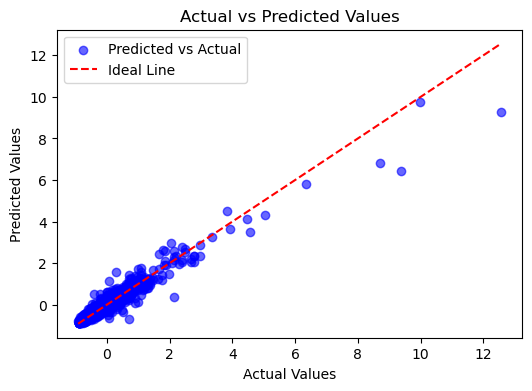

In [43]:
# Plot actual vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
